<!--NAVIGATION-->
< [自定义图表图例](04.06-Customizing-Legends.ipynb) | [目录](Index.ipynb) | [多个子图表](04.08-Multiple-Subplots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.07-Customizing-Colorbars.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Customizing Colorbars

# 个性化颜色条

> Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.
Because the book is printed in black-and-white, this section has an accompanying online supplement where you can view the figures in full color (https://github.com/jakevdp/PythonDataScienceHandbook).
We'll start by setting up the notebook for plotting and importing the functions we will use:

图例可以将离散的点标示为离散的标签。对于建立在不同颜色之上的连续的值（点线面）来说，标注了的颜色条是非常方便的工具。Matplotlib的颜色条是独立于图表之外的一个类似于比色卡的图形，用来展示图表中不同颜色的数值含义。因为本书是使用黑白打印的，本节内容中的所有带色彩的图都可以在(https://github.com/wangyingsm/Python-Data-Science-Handbook)中找到。我们还是首先导入本节需要的包和模块：

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

> As we have seen several times throughout this section, the simplest colorbar can be created with the ``plt.colorbar`` function:

通过`plt.colorbar`函数可以创建最简单的颜色条，在本节中我们会多次看到：

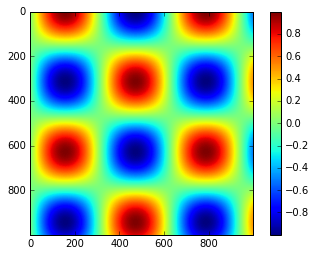

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

> We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

我们下面来讨论如何个性化颜色条以及在不同的场合高效的使用它们。

## Customizing Colorbars

## 自定义颜色条

> The colormap can be specified using the ``cmap`` argument to the plotting function that is creating the visualization:

颜色条可以通过`cmap`参数指定使用的色谱系统（或叫色图）：

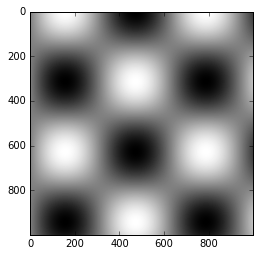

In [4]:
plt.imshow(I, cmap='gray');

> All the available colormaps are in the ``plt.cm`` namespace; using IPython's tab-completion will give you a full list of built-in possibilities:

所有可用的色图都可以在`plt.cm`模块中找到；在IPython中使用Tab自动补全功能能列出所有的色图列表：

```
plt.cm.<TAB>
```

> But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

但是知道在哪里选择色图只是第一步：更重要的是在各种选项中选出合适的色图。这个选择比你预料的要微妙的多。

### Choosing the Colormap

### 选择色图

> A full treatment of color choice within visualization is beyond the scope of this book, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
Matplotlib's online documentation also has an [interesting discussion](http://Matplotlib.org/1.4.1/users/colormaps.html) of colormap choice.

在可视化方案中选择颜色完整的介绍说明超出了本书的范围，如果你对这个课题和相关内容有兴趣，可以参考文章["绘制更漂亮图表的10个简单规则"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)。Matplotlib的在线文档也有一章关于色图选择的[有趣讨论](http://Matplotlib.org/1.4.1/users/colormaps.html)。

> Broadly, you should be aware of three different categories of colormaps:

> - *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., ``binary`` or ``viridis``).
> - *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., ``RdBu`` or ``PuOr``).
> - *Qualitative colormaps*: these mix colors with no particular sequence (e.g., ``rainbow`` or ``jet``).

通常来说，你应该注意以下三种不同类型的色图：

- *序列色图*：这类型的色谱只包括一个连续序列的色系（例如`binary`或`viridis`）。
- *分化色图*：这类型的色谱包括两种独立的色系，这两种颜色有着非常大的对比度（例如`RdBu`或`PuOr`）。
- *定性色图*：这类型的色图混合了非特定连续序列的颜色（例如`rainbow`或`jet`）。

> The ``jet`` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

`jet`色图，在Matplotlib 2.0版本之前都是默认的色图，是定性色图的一个例子。`jet`作为默认色图的位置其实有点尴尬，因为定性图通常都不是对定量数据进行展示的好选择。原因是定性图通常都不能在范围增加时提供亮度的均匀增长。

> We can see this by converting the ``jet`` colorbar into black and white:

我们可以通过将`jet`颜色条转换为黑白来看到这点：

In [5]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """返回给定色图的灰度版本"""
    cmap = plt.cm.get_cmap(cmap) # 使用名称获取色图对象
    colors = cmap(np.arange(cmap.N)) # 将色图对象转为RGBA矩阵，形状为N×4
    
    # 将RGBA颜色转换为灰度
    # 参考 http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114] # RGB三色的权重值
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight)) # RGB平方值和权重的点积开平方根
    colors[:, :3] = luminance[:, np.newaxis] # 得到灰度值矩阵
    # 返回相应的灰度值色图
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """将色图对应的灰度版本绘制出来"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

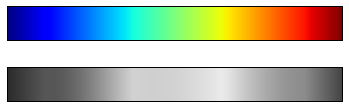

In [6]:
view_colormap('jet')

> Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as ``viridis`` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range.
Thus it not only plays well with our color perception, but also will translate well to grayscale printing:

注意一下上面的灰度图中亮条纹的位置。即使在上述彩色图中，也出现了这种不规则的亮条纹，这会导致眼睛被区域中亮条纹所吸引，这很可能造成阅读者被不重要的数据集部分干扰了。更好的选择是使用类似`viridis`这样的色图（Matplotlib 2.0后默认色图），它们被设计为有着均匀的亮度变化。因此它们无论是在彩色图中还是在灰度图中都有着同样的亮度变化：

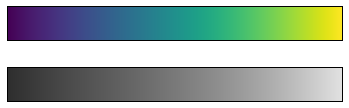

In [7]:
view_colormap('viridis')

> If you favor rainbow schemes, another good option for continuous data is the ``cubehelix`` colormap:

如果你更喜欢彩虹方案，另一个好的选择是使用`cubehelix`色图：

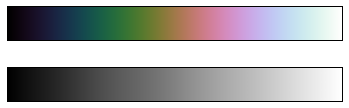

In [8]:
view_colormap('cubehelix')

> For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as ``RdBu`` (*Red-Blue*) can be useful. However, as you can see in the following figure, it's important to note that the positive-negative information will be lost upon translation to grayscale!

对于其他的情况，例如某种正负分布的数据集，双色颜色条如`RdBu`（*Red-Blue*）会很常用。然而正如你从下面例子看到的，如果将双色颜色条转化为灰度的话，正负或两级的信息就会丢失：

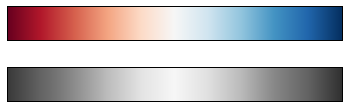

In [9]:
view_colormap('RdBu')

> We'll see examples of using some of these color maps as we continue.

后面我们会看到更多使用这些色图的例子。

> There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the ``plt.cm`` submodule. For a more principled approach to colors in Python, you can refer to the tools and documentation within the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).

Matplotlib中有大量可用的色图；要看到它们的列表，你可以使用IPython来探索`plt.cm`模块。要在Python中更加正规的使用颜色，你可以查看Seaborn库的工具和文档（参见[使用Seaborn进行可视化](04.14-Visualization-With-Seaborn.ipynb)）。

### Color limits and extensions

### 颜色限制和扩展

> Matplotlib allows for a large range of colorbar customization.
The colorbar itself is simply an instance of ``plt.Axes``, so all of the axes and tick formatting tricks we've learned are applicable.
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the ``extend`` property.
This might come in handy, for example, if displaying an image that is subject to noise:

Matplotlib允许你对颜色条进行大量的自定义。颜色条本身就是一个`plt.Axes`对象，因此所有轴和刻度定制的技巧都可以应用在上面。颜色条也有着一些有趣的自定义行为：例如，我们可以缩小颜色的范围并且通过设置`extend`参数将超出范围之外的数值展示为顶部和底部的三角箭头形状。这对于展示一些受到噪声干扰的数据时非常方便：

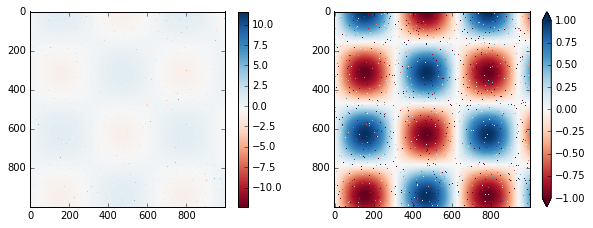

In [10]:
# 在I数组中人为生成不超过1%的噪声
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))
# 不考虑去除噪声时的颜色分布
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()
# 设置去除噪声时的颜色分布
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

> Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.
In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits.
The result is a much more useful visualization of our data.

注意到在左边的图表中，默认的颜色阈值是包括了噪声的，因此整体的条纹形状都被噪声数据冲刷淡化了。而右边的图表，我们手动设置了颜色的阈值，并在绘制颜色条是加上了`extend`参数来表示超出阈值的数据。对于我们的数据来说，右图比左图要好的多。

### Discrete Color Bars

### 离散颜色条

> Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins:

色图默认是连续的，但是在某些情况下你可能需要展示离散值。最简单的方法是使用`plt.cm.get_cmap()`函数，在传递某个色图名称的同时，还额外传递一个颜色分桶的数量值参数给该函数：

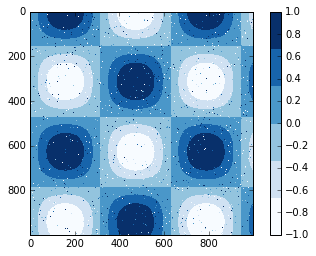

In [11]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

> The discrete version of a colormap can be used just like any other colormap.

离散色图的使用方式和其他色图没有任何区别。

## Example: Handwritten Digits

## 例子：手写数字

> For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data.
This data is included in Scikit-Learn, and consists of nearly 2,000 $8 \times 8$ thumbnails showing various hand-written digits.

最后我们来看一个很有实用价值的例子，让我们实现对一些手写数字图像数据的可视化分析。这个数据包含在Sciki-Learn中，以供包含有将近2,000张 $8 \times 8$ 大小的不同笔迹的手写数字缩略图。

> For now, let's start by downloading the digits data and visualizing several of the example images with ``plt.imshow()``:

首先，我们下载这个数据集，然后使用`plt.imshow()`将其中部分数据展示出来：

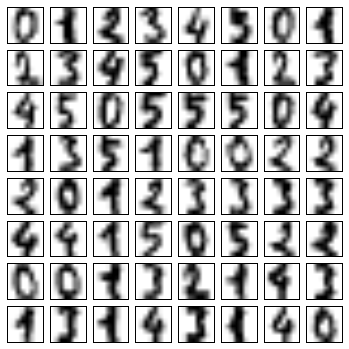

In [12]:
# 读取数字0-5的手写图像，然后使用Matplotlib展示头64张缩略图
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

> Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel.
But visualizing relationships in such high-dimensional spaces can be extremely difficult.
One way to approach this is to use a *dimensionality reduction* technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.
Dimensionality reduction is an example of unsupervised machine learning, and we will discuss it in more detail in [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb).

因为每个数字都是使用64个像素点渲染出来的，我们可以认为每个数字是一个64维空间中的点：每个维度代表这其中一个像素的灰度值。但是要在图表中将这么高维度空间的联系可视化出来是非常困难的。有一种做法是使用*降维*技术，比方说使用流形学习来减少数据的维度然而不会丢失数据中有效的信息。降维技术是无监督机器学习的一个例子，我们会在[什么是机器学习？](05.01-What-Is-Machine-Learning.ipynb)中更加详细的介绍它们。

> Deferring the discussion of these details, let's take a look at a two-dimensional manifold learning projection of this digits data (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) for details):

这些细节我们放在后面（参见[深入：流形学习](05.10-Manifold-Learning.ipynb)）讨论，我们来看一下将这些手写数字图像数据映射到二维流形学习当中：

In [13]:
# 使用Isomap将手写数字图像映射到二维流形学习中
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

> We'll use our discrete colormap to view the results, setting the ``ticks`` and ``clim`` to improve the aesthetics of the resulting colorbar:

我们使用离散颜色条来展示结果，设置`ticks`和`clim`来进一步美化结果的颜色条：

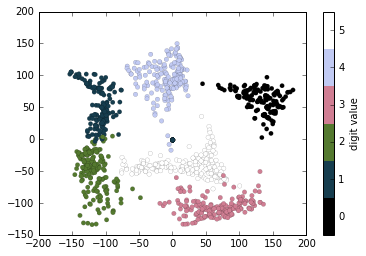

In [14]:
# 绘制图表结果
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

> The projection also gives us some interesting insights on the relationships within the dataset: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating that some hand written fives and threes are difficult to distinguish, and therefore more likely to be confused by an automated classification algorithm.
Other values, like 0 and 1, are more distantly separated, and therefore much less likely to be confused.
This observation agrees with our intuition, because 5 and 3 look much more similar than do 0 and 1.

我们从流形学习中的映射中可以观察到一些有趣现象：例如，图表中5和3有一些重叠的部分，这表示一些手写体中5和3是比较难以辨别的，因此对于自动识别算法来说这是比较容易混淆的部分。而0和1，它们在图表中距离很远，这表示两者比较容易辨别，不太可能造成混淆。这个图表分析与我们的直觉一致，因为5和3显然比0和1看起来更加接近。

> We'll return to manifold learning and to digit classification in [Chapter 5](05.00-Machine-Learning.ipynb).

我们会在[第五章](05.00-Machine-Learning.ipynb)再次看到流形学习和手写数字分类。

<!--NAVIGATION-->
< [自定义图表图例](04.06-Customizing-Legends.ipynb) | [目录](Index.ipynb) | [多个子图表](04.08-Multiple-Subplots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.07-Customizing-Colorbars.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
